In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools.Calculations import Calculations

In [2]:
FILE_PATH = './raw_data/high_18_cold_fullyOpen_noFault/000009ISO2XXX-1623669570-2021-06-14-11-22-59-AAARBT'
data = np.fromfile(FILE_PATH, dtype='uint16').reshape(-1,2)
calc = Calculations(data)

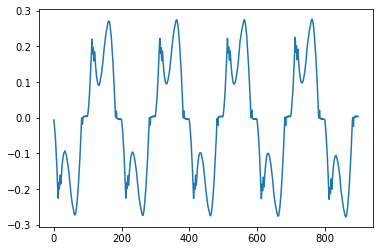

In [3]:
plt.plot(calc.current[:900])

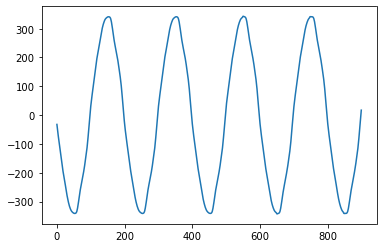

In [4]:
plt.plot(calc.voltage[:900])

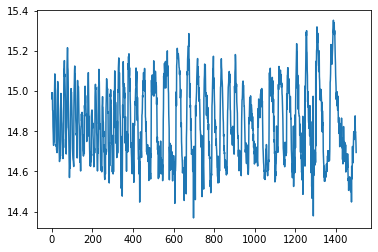

In [5]:
plt.plot(calc.reactive_power)

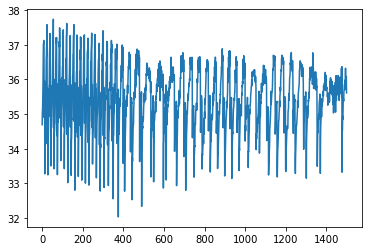

In [6]:
plt.plot(calc.real_power)

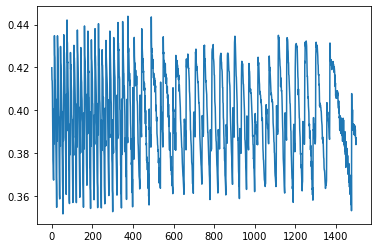

In [7]:
plt.plot(calc.thd)

In [8]:
FILE_PATH = './raw_data/high_18_cold_fullyOpen_noFault/000009ISO2XXX-1623668974-2021-06-14-11-09-34-AAARBS'
data = np.fromfile(FILE_PATH, dtype='uint16').reshape(-1,2)
calc = Calculations(data)

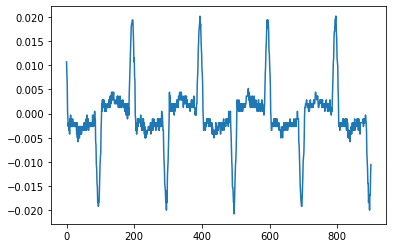

In [9]:
plt.plot(calc.current[:900])

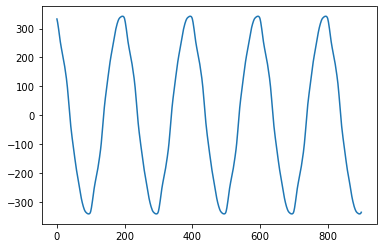

In [10]:
plt.plot(calc.voltage[:900])

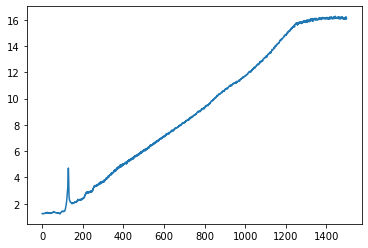

In [11]:
plt.plot(calc.reactive_power)

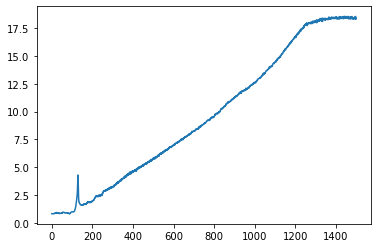

In [12]:
plt.plot(calc.real_power)

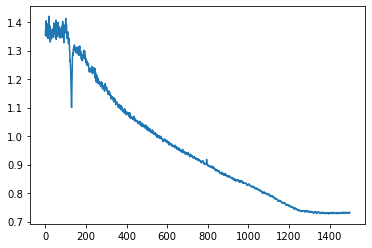

In [13]:
plt.plot(calc.thd)